# Impulsive flat plate

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1=ib.stretching(35, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s1=np.r_[s1, 2*s1[-1]-s1[-2::-1]]
s1/=s1[-1]

s2=ib.stretching(42, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s2=np.r_[s2, 2*s2[-1]-s2[-2::-1]]
s2/=s2[-1]

solver = ib.Solver(x=s1, y=s2, periodic=True, iRe=1/1000, Co=0.75, fractionalStep=False)

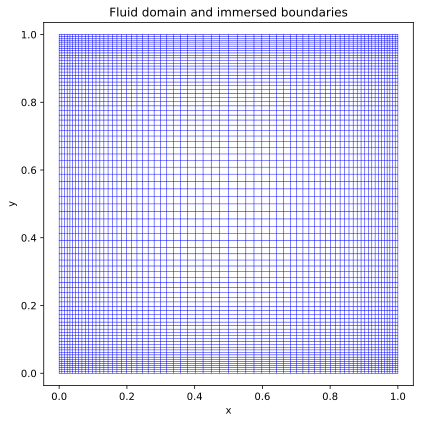

In [4]:
solver.plot_domain()

## Boundary conditions

In [5]:
uBC, vBC = solver.zero_boundary_conditions()
vBC[0][:] = 1

## Unsteady simulation

In [6]:
%%time
x, t, infodict = solver.steps(solver.zero(), uBC, vBC, saveEvery=int(1/solver.dt), number=int(10/solver.dt), verbose=int(1/solver.dt))

       k            t          x_2       dxdt_2 
     240  9.98921e-01  1.45492e+01  5.42510e+00 
     480  1.99784e+00  1.71626e+01  3.09324e+00 
     720  2.99676e+00  1.88447e+01  2.21624e+00 
     960  3.99568e+00  2.01078e+01  1.74527e+00 
    1200  4.99461e+00  2.11273e+01  1.44800e+00 
    1440  5.99353e+00  2.19860e+01  1.24194e+00 
    1680  6.99245e+00  2.27297e+01  1.09004e+00 
    1920  7.99137e+00  2.33870e+01  9.73056e-01 
    2160  8.99029e+00  2.39768e+01  8.79989e-01 
    2400  9.98921e+00  2.45121e+01  8.04051e-01 
    2402  9.99754e+00  2.45164e+01  8.03476e-01 
CPU times: user 1min 44s, sys: 1.32 s, total: 1min 45s
Wall time: 26.6 s


## Display results

Plot velocity components and pressure.

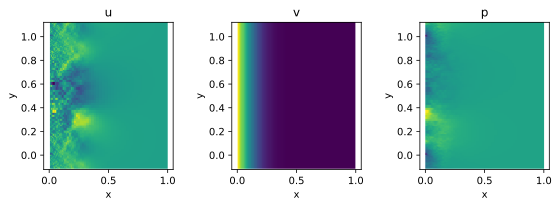

In [7]:
solver.plot_field(x[-1], xlim=(0, 1), ylim=(0, 1))

Check results against analytical solution given by
$$\frac{v(x, t)}{V} =  1 - \frac{2}{\pi} \int_0^{\frac{x}{2\sqrt{\nu t}}}  \exp\left(-\xi^2\right)\, \mathrm{d}\xi$$

In [8]:
from scipy.special import erfc

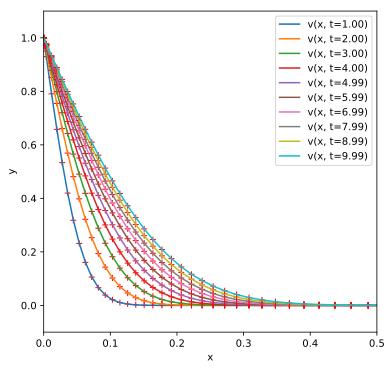

In [9]:
plt.figure(figsize=(5.5, 5.25))
vi = solver.fluid.v.shape[0]//2

vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]

for tk, xk in zip(t, x):
    u, v, p = solver.reshape(*solver.unpack(xk))
    vv = np.r_[vBC[0][vi], v[vi,:], vBC[1][vi]]
    plt.plot(vx, vv, '+r');
    plt.plot(vx, erfc(vx/(2*np.sqrt(solver.iRe*tk))), label='v(x, t=%.2f)'%tk);


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(0, 0.5)
plt.ylim(-0.1, 1.1);

Plot convergence history

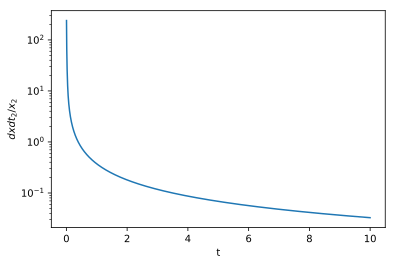

In [10]:
plt.figure()
plt.semilogy(infodict['t'], infodict['dxdt_2']/infodict['x_2'])
plt.xlabel('t')
plt.ylabel(r'$dxdt_2/x_2$');